In [3]:
import numpy as np
import xarray as xr
import dask
from matplotlib import pyplot as plt
import matplotlib.colors
%matplotlib inline
from xmitgcm import open_mdsdataset

In [6]:
import copy
def smooth_9p(data):
    inum = data.shape[1]
    jnum = data.shape[0]
    data_new = copy.deepcopy(data)
    for j in np.arange(1, jnum-1, 1):
        for i in np.arange(1, inum-1, 1):
            data_new[j, i] = np.nanmean(data[(j-1):(j+1), (i-1):(i+1)])
    return data_new

In [7]:
ds_ob = xr.open_dataset('../eke.nc')
ds_ob

<xarray.Dataset>
Dimensions:                        (lat: 720, lon: 1440)
Coordinates:
  * lat                            (lat) float32 -89.875 -89.625 ... 89.875
  * lon                            (lon) float32 0.125 0.375 ... 359.625 359.875
Data variables:
    __xarray_dataarray_variable__  (lat, lon) float64 ...

In [8]:
eke_data = ds_ob.sel(lon=slice(122,266), lat=slice(0,60)).__xarray_dataarray_variable__ * 1e4
lon1 = ds_ob.sel(lon=slice(122,266), lat=slice(0,60)).lon
lat1 = ds_ob.sel(lon=slice(122,266), lat=slice(0,60)).lat

In [9]:
data_dir = '/swot/SUM01/tongya/cox/fine/run_quik_ex2/'

ds = open_mdsdataset(data_dir, prefix={'xyMom_ave'}).chunk()

uvel = ds.UVEL[50:100, 0, :, :]
vvel = ds.VVEL[50:100, 0, :, :]
uvelsq = ds.UVELSQ[50:100, 0, :, :]
vvelsq = ds.VVELSQ[50:100, 0, :, :]
eke_u = 0.5 * (uvelsq - uvel**2) * 1e4
eke_v = 0.5 * (vvelsq - vvel**2) * 1e4
eke_u = eke_u.where(eke_u != 0)

eke_u = eke_u.load().data
eke_v = eke_v.load().data
    
eke = eke_u + eke_v
eke = eke.mean(0)

/home/tls2913/.conda/envs/geo_scipy/lib/python3.6/site-packages/xmitgcm/utils.py:336: UserWarning: Not sure what to do with rlev = L
  warnings.warn("Not sure what to do with rlev = " + rlev)


In [10]:
eke_data_new = smooth_9p(eke_data)
eke_new = smooth_9p(eke)

/home/tls2913/.conda/envs/geo_scipy/lib/python3.6/site-packages/ipykernel/__main__.py:8: RuntimeWarning: Mean of empty slice


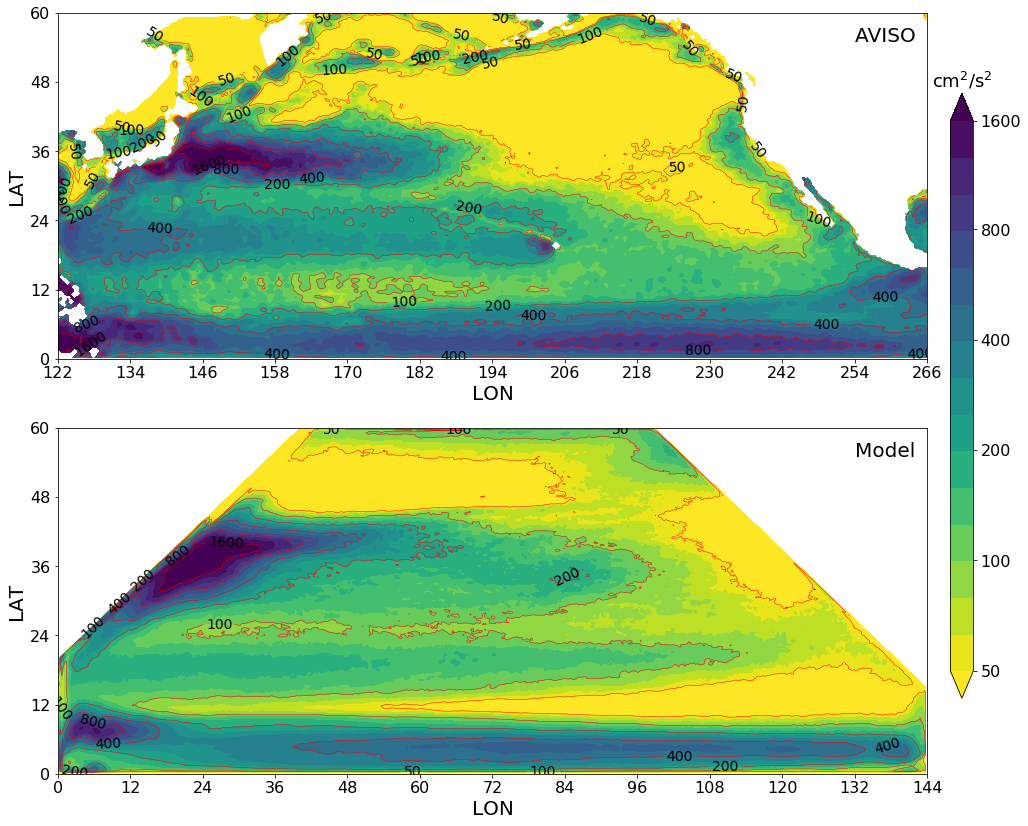

In [12]:

fig, ax = plt.subplots(figsize = (16, 14), ncols = 1, nrows = 2)

levs1 = np.arange(np.log10(50), np.log10(1600)+0.01, 0.1)

levs2 = np.array([np.log10(50), np.log10(100), np.log10(200), np.log10(400), np.log10(800), np.log10(1600)])

h1 = ax[0].contourf(lon1, lat1, np.log10(eke_data), levs1, cmap = 'viridis_r', 
                 vmin = np.log10(50), vmax = np.log10(1600), extend='both')

c_ticks = np.array([np.log10(50), np.log10(100), np.log10(200), np.log10(400), np.log10(800), np.log10(1580)])

#h2 = fig.colorbar(h1, ticks=c_ticks)
#h2.ax.set_yticklabels(['50','100','200','400','800','1600'])
#h2.ax.tick_params(labelsize=16)

h2 = ax[0].contour(lon1, lat1, np.log10(eke_data), levs2, colors ='r', linewidths=0.5)
#plt.clabel(h2, fontsize=14, colors='k', fmt='%2.0f')

h2.levels = np.array([np.log10(50), np.log10(100), np.log10(200), np.log10(400), np.log10(800), np.log10(1600)])
fmt = {}
strs = ['50', '100', '200', '400', '800', '1600']
for l, s in zip(h2.levels, strs):
    fmt[l] = s

ax[0].clabel(h2, h2.levels, inline=True, fmt=fmt, fontsize=14, colors='k')

x_ticks = np.arange(122, 267, 12)
y_ticks = np.arange(0, 61, 12)
ax[0].set_xticks(x_ticks)
ax[0].set_yticks(y_ticks)
ax[0].set_xlim(122, 266)
ax[0].set_ylim(0, 60)
ax[0].set_xticklabels(x_ticks,size=16)
ax[0].set_yticklabels(y_ticks,size=16)

ax[0].set_xlabel('LON', size = 20)
ax[0].set_ylabel('LAT', size = 20)
ax[0].text(254, 55, 'AVISO', size=20)

## plot 2
lon2 = ds.XC
lat2 = ds.YC

h1 = ax[1].contourf(lon2, lat2, np.log10(eke), levs1, cmap = 'viridis_r', 
                 vmin = np.log10(50), vmax = np.log10(1600), extend='both')

c_ticks = np.array([np.log10(50), np.log10(100), np.log10(200), np.log10(400), np.log10(800), np.log10(1580)])



h2 = ax[1].contour(lon2, lat2, np.log10(eke), levs2, colors ='r', linewidths=0.5)
#plt.clabel(h2, fontsize=14, colors='k', fmt='%2.0f')

h2.levels = np.array([np.log10(50), np.log10(100), np.log10(200), np.log10(400), np.log10(800), np.log10(1600)])
fmt = {}
strs = ['50', '100', '200', '400', '800', '1600']
for l, s in zip(h2.levels, strs):
    fmt[l] = s

ax[1].clabel(h2, h2.levels, inline=True, fmt=fmt, fontsize=14, colors='k')

x_ticks = np.arange(0, 145, 12)
y_ticks = np.arange(0, 61, 12)
ax[1].set_xticks(x_ticks)
ax[1].set_yticks(y_ticks)
ax[1].set_xlim(0, 144)
ax[1].set_ylim(0, 60)
ax[1].set_xticklabels(x_ticks,size=16)
ax[1].set_yticklabels(y_ticks,size=16)

ax[1].set_xlabel('LON', size = 20)
ax[1].set_ylabel('LAT', size = 20)
ax[1].text(132, 55, 'Model', size=20)

#h2 = fig.colorbar(h1, ticks=c_ticks)
#h2.ax.set_yticklabels(['50','100','200','400','800','1600'])
#h2.ax.tick_params(labelsize=16)

fig.subplots_adjust(right=0.88)
# put colorbar at desire position
cbar_ax = fig.add_axes([0.9, 0.2, 0.02, 0.6])
hc = fig.colorbar(h1, cax=cbar_ax, ticks=c_ticks)
hc.ax.set_yticklabels(['50','100','200','400','800','1600'])
hc.ax.tick_params(labelsize=16)
hc.ax.set_title('cm$^2$/s$^2$', size=18)

plt.savefig('Figure_02.png', dpi=300, bbox_inches='tight')